<a href="https://colab.research.google.com/github/RGencsev16/veritabani/blob/main/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import sklearn

In [2]:
#Kullanılacak veri setini bilgisayarımıza indirip oradan Colab ortamına yükledik

insurance = pd.read_csv('/content/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [8]:
insurance.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


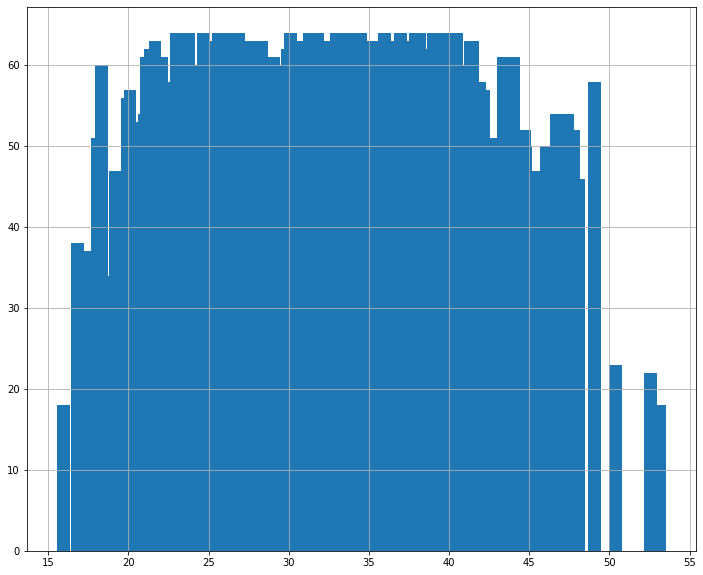

In [9]:
pl.figure(figsize = (12, 10))

pl.bar(insurance['bmi'], insurance['age'])

pl.grid()

pl.show()



In [10]:
insurance[insurance['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [11]:
insurance[insurance['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


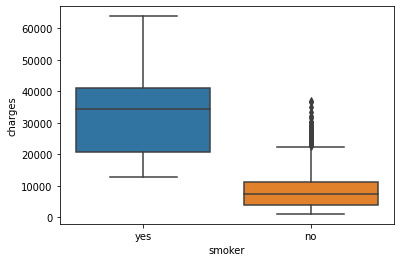

In [12]:
smoker_no = (insurance['smoker'] == 'no') 
smoker_yes = (insurance['smoker'] == 'yes')

sns.boxplot(data = insurance, x = 'smoker', y = 'charges')

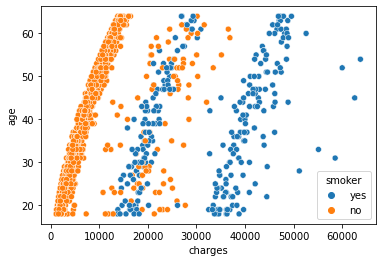

In [13]:
sns.scatterplot(data = insurance, x = 'charges', y = 'age', hue = 'smoker')

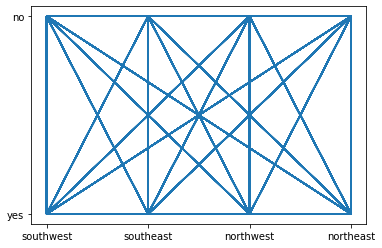

In [14]:
pl.plot(insurance['region'], insurance['smoker'])
pl.show()

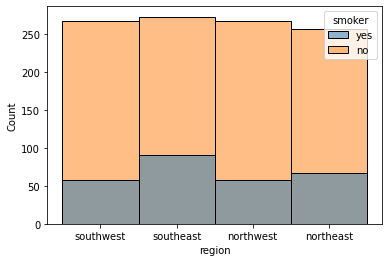

In [15]:
sns.histplot(data = insurance, x = 'region', hue = 'smoker')

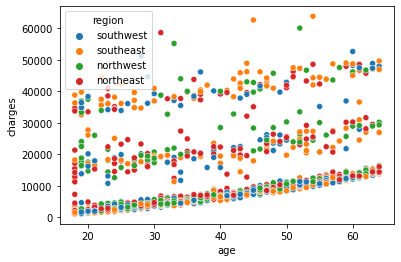

In [16]:
sns.scatterplot(data = insurance, x = 'age', y = 'charges', hue = 'region')

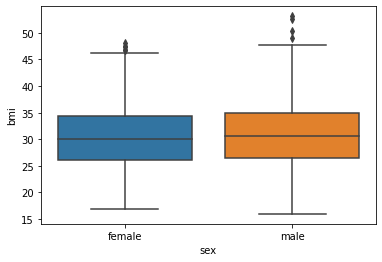

In [17]:
sns.boxplot(data = insurance, x = 'sex', y = 'bmi')

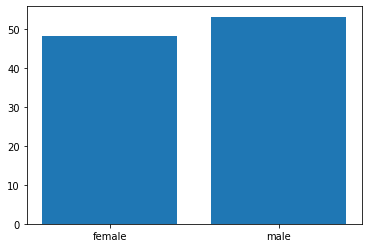

In [18]:
pl.bar(insurance['sex'], insurance['bmi'])
pl.show()

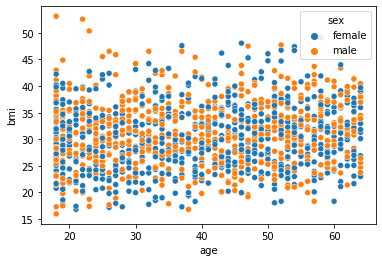

In [19]:
sns.scatterplot(data = insurance, x = 'age', y = 'bmi', hue = 'sex')


In [20]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [21]:
#for names in :
insurance['region'].describe()
  

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

<BarContainer object of 1338 artists>

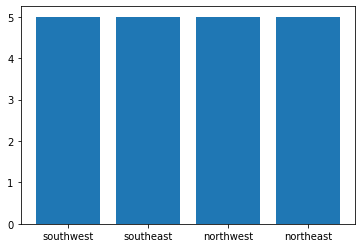

In [22]:
pl.bar(insurance['region'], insurance['children'])

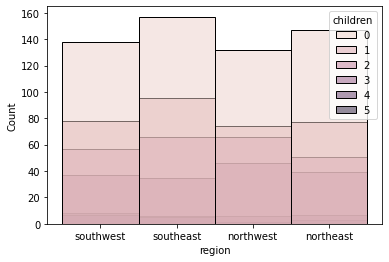

In [23]:
sns.histplot(data = insurance, x = 'region', hue = 'children')

In [24]:
#oe hot encoding
sex = insurance.iloc[:, 1:2].values
print(sex)

[['female']
 ['male']
 ['male']
 ...
 ['female']
 ['female']
 ['female']]


In [25]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
feature_array = ohe.fit_transform(insurance[['sex']]).toarray()


In [26]:
feature_labels = ohe.categories_

print(feature_labels)

[array(['female', 'male'], dtype=object)]


In [27]:
feature_labels = np.array(feature_labels).ravel()

print(feature_labels)

['female' 'male']


In [28]:
features = pd.DataFrame(feature_array, columns = feature_labels)

features.head()

,female,male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [29]:
insurance = insurance.copy()
insurance['smoker'] = insurance['smoker'].map({'yes':1, 'no':0})

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [30]:
#label encoding
feature_array = ohe.fit_transform(insurance[['region']]).toarray()
region_labels = ohe.categories_
print(region_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [31]:
region_labels = np.array(region_labels).ravel()

print(region_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [32]:
regions = pd.DataFrame(feature_array, columns = region_labels)

regions.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [33]:
data_new = pd.concat([insurance, regions, features], axis=1)

data_new = data_new.drop(columns='region', axis=1)
data_new = data_new.drop(columns='sex', axis=1)

data_new.head()

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,female,male
0,19,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0
1,18,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0
2,28,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0
3,33,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0
4,32,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
y = data_new.charges
x = data_new.drop(columns='charges', axis=1)

In [35]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [37]:
print(x)

      age     bmi  children  smoker  northeast  northwest  southeast  \
0      19  27.900         0       1        0.0        0.0        0.0   
1      18  33.770         1       0        0.0        0.0        1.0   
2      28  33.000         3       0        0.0        0.0        1.0   
3      33  22.705         0       0        0.0        1.0        0.0   
4      32  28.880         0       0        0.0        1.0        0.0   
...   ...     ...       ...     ...        ...        ...        ...   
1333   50  30.970         3       0        0.0        1.0        0.0   
1334   18  31.920         0       0        1.0        0.0        0.0   
1335   18  36.850         0       0        0.0        0.0        1.0   
1336   21  25.800         0       0        0.0        0.0        0.0   
1337   61  29.070         0       1        0.0        1.0        0.0   

      southwest  female  male  
0           1.0     1.0   0.0  
1           0.0     0.0   1.0  
2           0.0     0.0   1.0  
3      

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
#linear regression
#logic regression
#svm